# Group Assignment: Data Preparation and Visualization

## 1. Group members

Student 1 - Christopher Kim

Student 2 - Nathanael McGothlin

Student 3 - Shashank Sundar

Student 4 - Miles Turnage

Student 5 - Samay Upadhyay

***

## 2. Contribution report

After completing the assignment, please answer the following questions **as a group** by adding your answers within this markdown block.

1. In a few sentences, describe each group member's individual contributions to the submission. Be as specific as possible (e.g. coordinated group efforts, specific problems answered, specific problems reviewed/revised, sections of the submission written, etc.).

    Student 1 - 
    
    Student 2 - 
    
    Student 3 - 
    
    Student 4 -

2. In a few sentences, describe what was learned in completing this assignment. In particular, describe what was learned through the **specific individual contributions** mentioned above.
    
    Student 1 - 
    
    Student 2 - 
    
    Student 3 - 
    
    Student 4 -

***

## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker SQLPython Container directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. A single Jupyter Notebook (.ipynb).  **You must run all cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. A PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [1]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

For our next shareholder meeting, we need to provide more information about sales performance across states, across dealerships, and across sales channels.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. In states with dealerships, how has the distribution of sales amounts changed over time for different channels (internet vs. dealership) and sales types (low, typical, high value)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2016 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.  Attribute sales to states based on the **state in which the customer that made the purchase resides**.  This way we can capture both sales made through dealerships, as well as sales made through our website, in evaluating state-level performance.  


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [2]:
#1.1 sql query
total_sales=pd.read_sql_query('''SELECT state, ROUND(SUM(sales_amount)::numeric, 2) AS total_sales_amount    
FROM sales
JOIN customers
ON sales.customer_id=customers.customer_id
WHERE state is NOT NULL AND sales_transaction_date >= '2016-01-01'
GROUP BY state  
ORDER BY total_sales_amount DESC''', engine)

In [3]:
#1.2 create dataframe
sales_by_state = pd.DataFrame(total_sales)
sales_by_state

,state,total_sales_amount
0,CA,22515321.10
1,TX,20460753.41
2,FL,15429244.06
3,NY,11466817.18
4,PA,7354693.62
5,OH,6422792.89
6,VA,6207662.55
7,DC,5999408.59
8,MO,5656370.09
9,GA,5564254.15


In [4]:
#1.3 display top 5 performing states
top_states = sales_by_state.head(5)
top_states

,state,total_sales_amount
0,CA,22515321.10
1,TX,20460753.41
2,FL,15429244.06
3,NY,11466817.18
4,PA,7354693.62


In [5]:
#1.4 display bottom 5 performing states
bottom_states = sales_by_state.sort_values(by='total_sales_amount', ascending=True).head(5)
bottom_states

,state,total_sales_amount
50,WY,4699.91
49,RI,8849.84
48,VT,31414.93
47,ME,103364.89
46,SD,145199.46


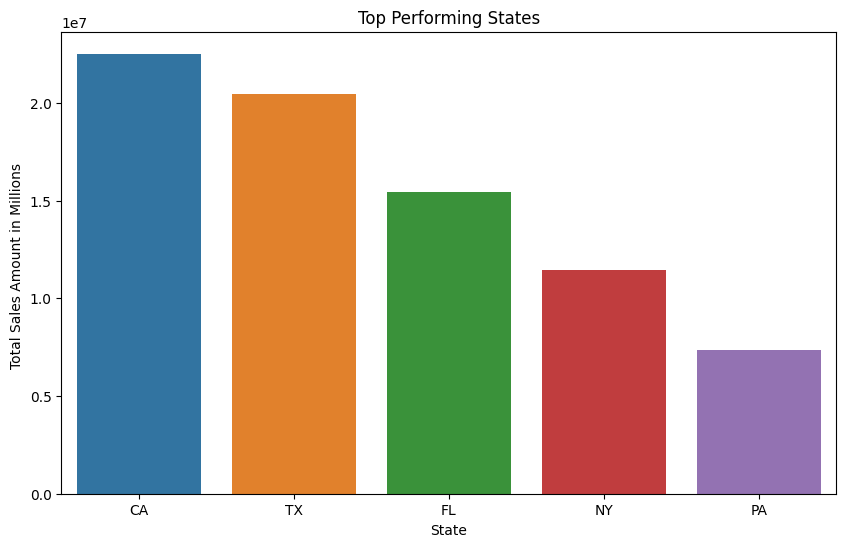

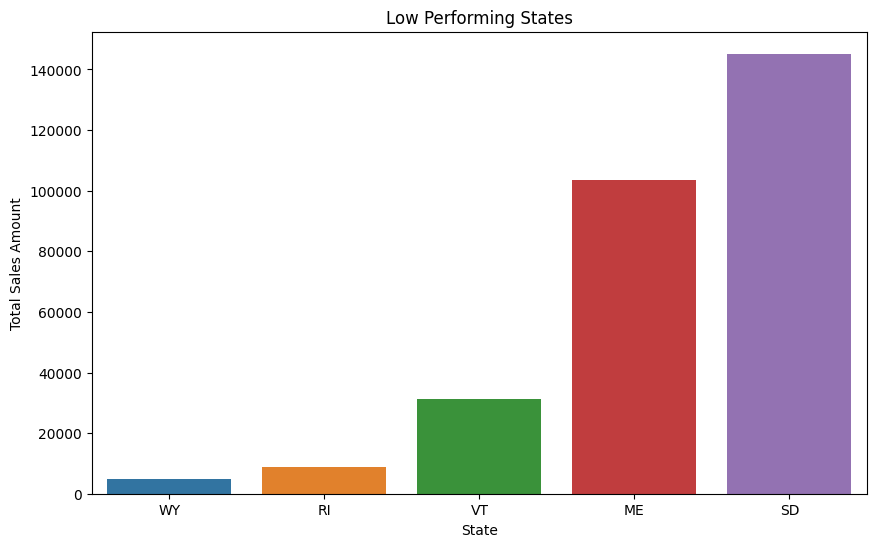

In [6]:
#1.5 visualize top and bottom performing states
plt.figure(figsize=(10,6))
sns.barplot(x="state",y="total_sales_amount",data=top_states)
plt.xlabel("State")
plt.ylabel("Total Sales Amount in Millions ")
plt.title("Top Performing States")
plt.show();
plt.figure(figsize=(10,6))
sns.barplot(x="state",y="total_sales_amount",data=bottom_states)
plt.xlabel("State")
plt.ylabel("Total Sales Amount")
plt.title("Low Performing States")
plt.show();

## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2016 to now.  Only include dealerships located in the *top two* states determined in Part 1.  It is OK to reference these two states by their abbreviations (e.g. AL, MS, WY) in the query you will develop below since this is a one-off request.

To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`state`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2016 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `dealership_id` and `state` are replaced with appropriate text like 'ID' and 'State', etc.). 

In [7]:
#2.1 SQL Query
cumulative_sales=pd.read_sql_query('''SELECT d.dealership_id AS dealership_id, state, sales_transaction_date::DATE,ROUND(SUM(sales_amount) OVER (PARTITION BY d.dealership_id ORDER BY sales_transaction_date)::numeric,2) AS cumulative_sales    
FROM sales as s
JOIN dealerships AS d ON s.dealership_id = d.dealership_id
WHERE sales_transaction_date >= '2016-01-01' AND state in ('CA','TX')
ORDER BY d.dealership_id,sales_transaction_date;''', engine) 

In [8]:
#2.2 create a pandas dataframe
cumulative_sales_bydealership=pd.DataFrame(cumulative_sales)
cumulative_sales_bydealership

,dealership_id,state,sales_transaction_date,cumulative_sales
0,2,CA,2016-01-05,499.99
1,2,CA,2016-01-07,999.98
2,2,CA,2016-01-08,1499.97
3,2,CA,2016-01-11,1999.96
4,2,CA,2016-01-11,2499.95
...,...,...,...,...
3864,19,TX,2019-05-25,6384243.75
3865,19,TX,2019-05-25,6384593.74
3866,19,TX,2019-05-28,6385293.73
3867,19,TX,2019-05-30,6385643.72


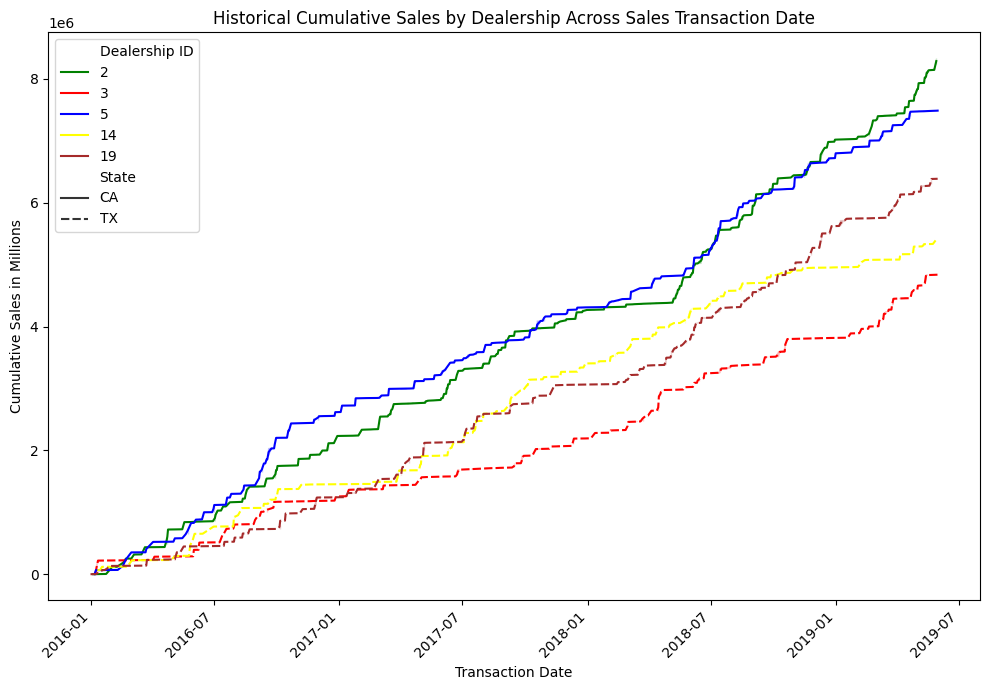

In [9]:
#2.3 visualization of transaction date on dealership sales
plt.figure(figsize=(10, 7))
dealership_colors = {"CA": "blue","TX": "red",2: "green",3: "red",5: "blue",14: "yellow",19: "brown"}
ax = sns.lineplot(x="sales_transaction_date",y="cumulative_sales",data=cumulative_sales_bydealership,hue='dealership_id',style='state',palette=dealership_colors)

ax.set(xlabel = 'Transaction Date',ylabel ='Cumulative Sales in Millions')
plt.xticks(rotation=45, ha='right')
plt.title('Historical Cumulative Sales by Dealership Across Sales Transaction Date')
L = plt.legend()
L.get_texts()[0].set_text('Dealership ID')
L.get_texts()[6].set_text('State')

plt.tight_layout()
plt.show();


## Part 3: Sales amount by sales channel and sales type

Create tables and visualizations to compare sales amounts by sales channel for sales made on or after January 1, 2016 and before January 1, 2019.  **Only include sales made to customers that reside in a state that has a dealership.** To do this, perform the following steps:
    
   1. Write a SELECT query that returns sales with a transaction date on or after January 1, 2016 and before January 1, 2019 from the `sales` table made to customers that reside in a state that has a dealership.  This table should have the following four columns: `channel`,`sales_amount`, and `sales_type` and `sales_year`. `channel` and `sales_amount` are exactly as appears in the `sales` table. `sales_type` is a derived categorical field that takes on a value of `'High value'` when `sales_amount` is above 50000, `'Typical value'` when `sales_amount` is above 10000 but less than or equal to 50000, and `'Low value'` when `sales_amount` is less than 10000.  `sales_year` is the year from the `sales_transaction_date` field.  
   
   
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_from_dealershipstates`.
   
   
   3. Appropriately visualize the distribution of sales amounts and how it changes by `channel`, `sales_year`, and `sales_type`.  To do this, create multiple plots, one for each distinct combination of `channel` and `sales_type`.  For each plot, visualize and compare the distribution of sales amounts for each sales year (2016, 2017, 2018) by superimposing these yearly distributions on the same plot.  For example, one plot will visualize distribution of sales amounts in 2016, 2017, and 2018 for low value internet sales.  Arrange the plots so that you can see changes across `channel` and `sales_type` (*Hint: seaborn.FacetGrid*). Visualizations should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, replace variable names like `sales_year` with appropriate text like 'Year', etc.). 

In [10]:
#3.1 select query

resultquery = pd.read_sql_query('''SELECT channel, sales_amount, 
CASE 
  WHEN sales_amount > 50000 THEN 'High value'
  WHEN sales_amount > 10000 AND sales_amount <= 50000 THEN 'Typical value'
  ELSE 'Low value'
END as sales_type,
EXTRACT(YEAR FROM sales_transaction_date)::INT as sales_year
FROM sales s JOIN customers c ON s.customer_id = c.customer_id
where sales_transaction_date >= '2016-01-01' and sales_transaction_date <= '2019-01-01'AND state IN (SELECT DISTINCT state FROM dealerships);
''', engine)

print(resultquery)

          channel  sales_amount  sales_type  sales_year
0      dealership       599.990   Low value        2017
1      dealership       539.991   Low value        2017
2      dealership       599.990   Low value        2017
3      dealership       599.990   Low value        2017
4      dealership       539.991   Low value        2016
...           ...           ...         ...         ...
11476    internet     52400.000  High value        2016
11477  dealership     65500.000  High value        2017
11478    internet     65500.000  High value        2016
11479  dealership     65500.000  High value        2017
11480  dealership     65500.000  High value        2016

[11481 rows x 4 columns]


In [11]:
#3.2 create data frame
sales_from_dealershipstates = pd.DataFrame(resultquery)

print(sales_from_dealershipstates)


          channel  sales_amount  sales_type  sales_year
0      dealership       599.990   Low value        2017
1      dealership       539.991   Low value        2017
2      dealership       599.990   Low value        2017
3      dealership       599.990   Low value        2017
4      dealership       539.991   Low value        2016
...           ...           ...         ...         ...
11476    internet     52400.000  High value        2016
11477  dealership     65500.000  High value        2017
11478    internet     65500.000  High value        2016
11479  dealership     65500.000  High value        2017
11480  dealership     65500.000  High value        2016

[11481 rows x 4 columns]


Text(0.5, 0.98, 'Sales Amount Distribution by Channel, Type, and Year (2016-2018)')

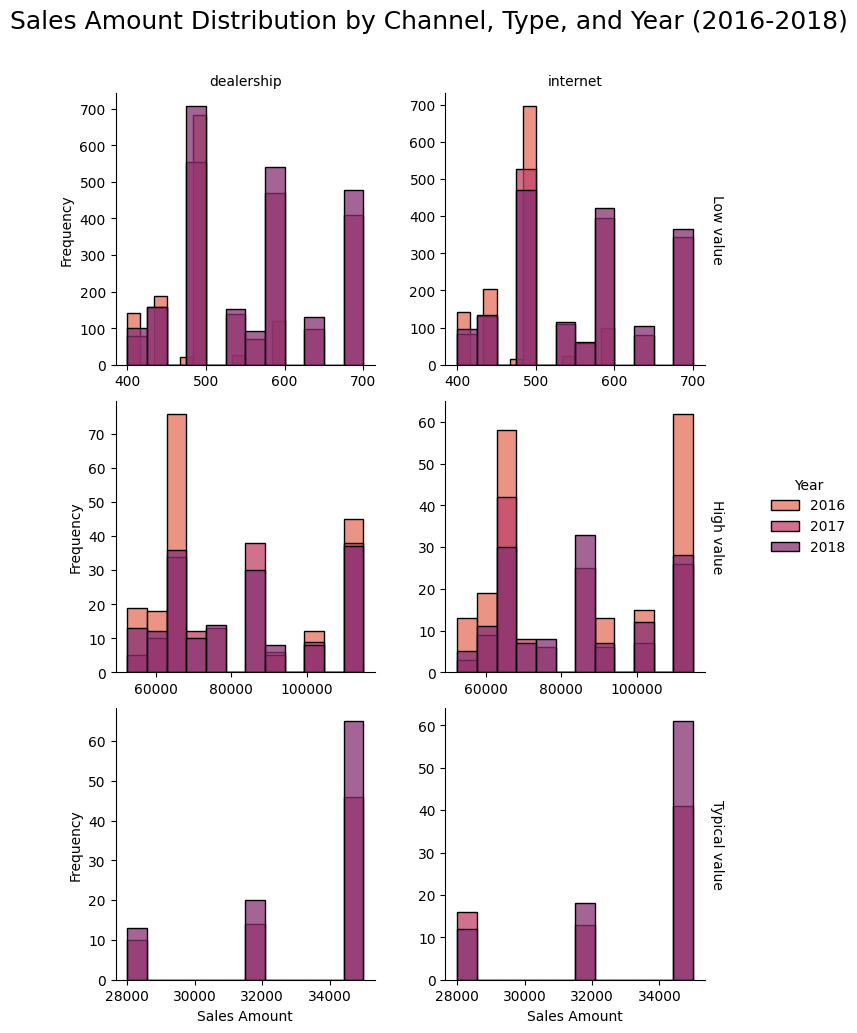

In [12]:
#3.3 visualization
sfd = sns.FacetGrid(sales_from_dealershipstates, col="channel", row="sales_type", hue="sales_year", margin_titles=True, height=3.5, palette="flare", sharex=False, sharey=False)
sfd.map(sns.histplot, "sales_amount", bins=12)
# Add a legend and adjust layout
sfd.add_legend(title ="Year")
sfd.fig.subplots_adjust(top=0.9)
sfd.fig.suptitle('Sales Amount Distribution by Channel, Type, and Year (2016-2018)', fontsize=18)
# Set axis labels
sfd.set_axis_labels("Sales Amount", "Frequency")
sfd.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()




## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 
   
   
   5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

    The top 5 performing states correspond directly to the 5 most populated states in the United States. Thus, it is no surprise that they make the top of this list. A more interesting analysis could examine the average dealership sales across each state, so we could see which states are performing best relative to the number of dealerships they have. To do this, we could conduct a two-sample t-test for the difference in means, where the two groups of interest are 1) all dealerships from the top states and 2) all dealerships from remaining states. Alternatively, we could conduct a regression analysis relating the quantitative variables of total sales and state population.

 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
 
     Similarly, the bottom 5 performing states are some of the least populated states in the United States. The most obvious exception to this is Maine, which had the fourth-least total sales, but is only the 9th-least populated U.S. state. It would be more insightful to examine the mean sales amount across all dealerships in Maine, since it's possible that there are just fewer dealerships in Maine than in other low-populated states. We could use basic outlier detection methods (like the IQR rule) to determine if the mean sales in Maine is still an outlier relative to other states.

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 

    All dealerships visualized in part 2 demonstrated an overall increase in total sales amount over 2016-2018. The California dealerships have grown their sales at a more rapid pace than the Texas dealerships, but this may just be due to the population and market size in California, which is a bigger state than Texas. Within Texas, dealership 3 has struggled to keep up with the others in terms of their sales growth, and it may be worth investigating why that dealership has been a bit more stagnant (even though their growth overall has still been very good). Of course, dealership size may play some role in this. For example, if dealership 3 employees less salespeople than the other Texas dealerships, then their slower growth rate would be less concerning.

 4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 
 
     It seems that 2016 was comprised chiefly of high-value sales; there were almost no typical-value sales in 2016, and very few low-value sales. For dealership vs. internet channels, the distribution of sale amounts looks very similar for the typical-value and high-value transactions, but among low-value sales, the channel frequency has shifted away slightly from internet and more towards dealerships. Finally, the highest-value sales (above 100,000) ocurred most frequently in 2016, and these sales have declined in 2017-2018, particularly over the internet.

5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

    The shift from internet to dealerships over the years for low-value sales seems counterintuitive. There are two things to keep in mind here, however. First, the years in question (2016-2018) took place before the pandemic and rise of online car dealerships. Second and more importantly, this shift only took place for low-value transactions. 
    
    These low-value transactions may have been for car parts rather than cars themselves, and customers may want to get car parts in-person so they can ensure the fit is correct. To check to see if this shift is actually significant, we could conduct a two-sample z-test for the difference in proportions. Group 1 would be high-value sales from 2016, and group 2 would be high-value sales from 2017-2018. The 'proportion' for each group would be the proportion of these high-value transactions that took place over the internet (as opposed to the dealership).